# Mini-project - creating a dataframe from analysed text data

For this project you are going to use the IBM Watson Tone Analyser API.  You will send text data to it, use security information stored in a config file to keep it secret, receive the results in JSON format, investigate the structure of the results and build a dataframe from them.

Then you will use the results to create a visualisation of tone and to report an overall set of statistics from the data.

---

## Step 1 - sign up for IBM Watson services to use the Tone Analyser

1.  Sign up for IBM Watson: https://www.ibm.com/cloud/watson-studio  
2.  Click 'Try on Cloud at no cost'  
3.  Select the London region  (costs reduced and performance improved when you use the nearest servers)  
4.  Create an IBM Cloud account (enter email and accept terms)  
5.  Follow the instructions to create the account  
6.  Provision the services  
7.  Then go to IBM Watson Studio  
8.  Select Tone Analyzer under the Your Services heading  
9.  You will be shown the **url** for the Tone Analyser API and an **API key** which is needed for using the API.

---

## Test to make sure it works

1.  Download this file, which has some text for you to test with: https://drive.google.com/file/d/1m65cPQGYQd1mwvEmfZw69-GMUBdo43k0/view?usp=sharing, put the file in the same folder as this worksheet for now.

2.  Create a second text file in the same folder as this worksheet that will hold the credentials for your IBM connection to the Tone Analyser.  Add the following text to this file and save it as 'config.txt'

{"config":{"url": "...the url you got from the IBM Tone Analyser...", "apikey":"... the API key from the analyser ..."}}  

These credentials will never appear in your code as will only be readable on your device.

3.  Run the code below,which will create a ToneAnalyzer with the credentials from your **config.txt** file, then feed the text from the **text-for-analysis.txt** file

4.  Decide what the data looks like and how this might be represented in a pandas dataframe

In [1]:
pip install --upgrade ibm-watson


Note: you may need to restart the kernel to use updated packages.


In [26]:
from ibm_watson import ToneAnalyzerV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
import os
import json

# get credentials from the file config.txt
def get_secret(key):
    # add code here to open the config.txt file and return the value associated with the iey (either 'apikey' or 'url')
    config_file = open("config.txt", "r")
    config = json.loads(config_file.readline())
    config_file.close()
    return config['config'][key]
 


    
def get_text_for_analysis():
    # add code here to open the text-for-analysis.txt file and return the text it reads as one string
    # if there is an error, return None
    text_file = open("text-for-analysis.txt")
    text_data = ""
    for line in text_file:
        text_data += line + " "
    return text_data

     
    
# create a ToneAnalyzerV3 object, version 2017-09-21 using api key and url from config
authenticator = IAMAuthenticator(apikey=get_secret('api_key'))
tone_analyzer = ToneAnalyzerV3(
    version='2017-09-21',
    authenticator=authenticator
)
tone_analyzer.set_service_url(get_secret('url'))

# get the text for analysis from the file
text = get_text_for_analysis()
if text:
    tone_analysis = tone_analyzer.tone(
        {'text': text},
        content_type='application/json'
    ).get_result()    
    print(tone_analysis)
else:
    print("No data")

{'document_tone': {'tones': [{'score': 0.6165, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.829888, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}, 'sentences_tone': [{'sentence_id': 0, 'text': 'Team, I know that times are tough!', 'tones': [{'score': 0.801827, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}, {'sentence_id': 1, 'text': 'Product sales have been disappointing for the past three quarters.', 'tones': [{'score': 0.771241, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.687768, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}, {'sentence_id': 2, 'text': "We have a competitive product, but we need to do a better job of selling it!'", 'tones': [{'score': 0.506763, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}]}


### Create (on paper) an idea of how this data might be organised into a data table

1.  How many bits of information are there about the document as a whole?
2.  How many bits of information are there about each sentence?
3.  If all tone analysis records were included in the dataframe, how many rows would there be?
4.  What information would be included in each row?

### Create a dataframe and start to populate with the data

Before you can create a dataframe from this data you will need to convert it into a table.  One way to do this would be to create a list of dictionary records, with each record formed from the data from each row in the original 'sentences_tone' data.  You will need to loop through the rows in the 'sentences_tone' list, nesting a loop through the 'tones' list for each sentence.  For each, copy across the columns you feel should be included.

_Hint:_  
` for row in sentence_data:
        for col in row['tones']:
            new_row = {'sentence_id':row['sentence_id'], 'text':row['text'], 'tone_score':col['score'], 'tone_id':col['tone_id'],'tone_name':col['tone_name']}`


In [27]:
import pandas as pd
import numpy as np

# convert json data to table format with one row for each tone for each sentence
def convert_to_tones(json_data):
    # add code here to convert the json_data from the text file into a table form
    # return the data normalized into a dataframe (pd.json_normalise(json_table))
    datatable = []
    for sentences in json_data["sentences_tone"]:
        for tones in sentences["tones"]:
            row = {"sentence_id":sentences["sentence_id"],"text": sentences["text"],'score': tones['score'],'tone_id': tones['tone_id'],'tone_name': tones['tone_name']}
            datatable.append(row)   
    return pd.json_normalize(datatable)       
                

tone_data = convert_to_tones(tone_analysis)
tone_data




,sentence_id,text,score,tone_id,tone_name
0,0,"Team, I know that times are tough!",0.801827,analytical,Analytical
1,1,Product sales have been disappointing for the ...,0.771241,sadness,Sadness
2,1,Product sales have been disappointing for the ...,0.687768,analytical,Analytical
3,2,"We have a competitive product, but we need to ...",0.506763,analytical,Analytical


### Summarise the sentence data
*  Which sentence is the most analytical?
*  which sentence is the least analytical?
*  what is the average analytical tone score for the sentences?
*  what do the analytical scores look like in a bar chart?

,sentence_id,text,score,tone_id,tone_name
0,0,"Team, I know that times are tough!",0.801827,analytical,Analytical
2,1,Product sales have been disappointing for the ...,0.687768,analytical,Analytical
3,2,"We have a competitive product, but we need to ...",0.506763,analytical,Analytical


The most analytical sentence is  0.801827
The least analytical sentence is  0.506763
The average analytical tone score is 0.6654526666666666


<AxesSubplot:xlabel='sentence_id', ylabel='score'>

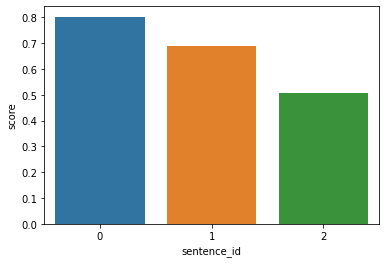

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

tone_data_sorted = tone_data[tone_data['tone_id'].str.contains('analytical')]
display (tone_data_sorted)

#most analytical sentence
maximum = tone_data_sorted['score'].max()
print ('The most analytical sentence is ', maximum)

#least analytical sentence
minimum = tone_data_sorted['score'].min()
print ('The least analytical sentence is ', minimum)

#average analytical tone score
average_score = tone_data_sorted['score'].mean()
print ('The average analytical tone score is', average_score )

#seaborn barchart showing tone scores for each sentence_id.
x = tone_data_sorted["sentence_id"]
y = tone_data_sorted["score"]

sns.barplot(x = x, y = y, data = tone_data_sorted)



### Report the tone data for the whole document
---

Play with the data, create a dataframe for the document_tone, tones data (pd.json_normalize(document_tone
Display the document score for each of the tones in the analysis

In [20]:
def get_tones_table(json_data):
    # add code here to convert the json_data from the text file into a table form
    # return the data normalized into a dataframe (pd.json_normalise(json_table))
    datatable = []
    for tones in json_data["document_tone"]["tones"]:
            row = {"score":tones["score"],"tone_id":tones["tone_id"], "tone_name": tones['tone_name']}
            datatable.append(row)   
    return pd.json_normalize(datatable)       
                

tone_data = get_tones_table(tone_analysis)
tone_data

,score,tone_id,tone_name
0,0.616500,sadness,Sadness
1,0.829888,analytical,Analytical


### Change the text in the text file and analyse the new text.
---

Here is some alternative, happier text.  Replace the text in the text-for-analysis.txt file with the text below.  Then run the notebook cells again to see the results.

But I feel peaceful. Your success in the ring this morning was, to a small degree, my success. Your future is assured. You will live, secure and safe, Wilbur. Nothing can harm you now. These autumn days will shorten and grow cold. The leaves will shake loose from the trees and fall. Christmas will come, and the snows of winter. You will live to enjoy the beauty of the frozen world, for you mean a great deal to Zuckerman and he will not harm you, ever. Winter will pass, the days will lengthen, the ice will melt in the pasture pond. The song sparrow will return and sing, the frogs will awake, the warm wind will blow again. All these sights and sounds and smells will be yours to enjoy, Wilbur-this lovely world, these precious days.

### Find your own examples of text, replace the text in the file again, and analyse the results.

In [21]:
# get credentials from the file config.txt
def get_secret(key):
    # add code here to open the config.txt file and return the value associated with the iey (either 'apikey' or 'url')
    config_file = open("config.txt", "r")
    config = json.loads(config_file.readline())
    config_file.close()
    return config['config'][key]
 


    
def get_text_for_analysis():
    # add code here to open the text-for-analysis.txt file and return the text it reads as one string
    # if there is an error, return None
    text_file = open("text-for-analysis-2.txt")
    text_data = ""
    for line in text_file:
        text_data += line + " "
    return text_data

     
    
# create a ToneAnalyzerV3 object, version 2017-09-21 using api key and url from config
authenticator = IAMAuthenticator(apikey=get_secret('api_key'))
tone_analyzer = ToneAnalyzerV3(
    version='2017-09-21',
    authenticator=authenticator
)
tone_analyzer.set_service_url(get_secret('url'))

# get the text for analysis from the file
text = get_text_for_analysis()
if text:
    tone_analysis = tone_analyzer.tone(
        {'text': text},
        content_type='application/json'
    ).get_result()    
    print(tone_analysis)
else:
    print("No data")

{'document_tone': {'tones': [{'score': 0.689564, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.527599, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.802229, 'tone_id': 'confident', 'tone_name': 'Confident'}]}, 'sentences_tone': [{'sentence_id': 0, 'text': 'But I feel peaceful.', 'tones': [{'score': 0.511185, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.88939, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}, {'sentence_id': 1, 'text': 'Your success in the ring this morning was, to a small degree, my success.', 'tones': [{'score': 0.919911, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, {'sentence_id': 2, 'text': 'Your future is assured.', 'tones': [{'score': 0.97759, 'tone_id': 'confident', 'tone_name': 'Confident'}]}, {'sentence_id': 3, 'text': 'You will live, secure and safe, Wilbur.', 'tones': [{'score': 0.92125, 'tone_id': 'confident', 'tone_name': 'Confident'}, {'score': 0.801827, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}, {'sentence_id': 4, 'text'

In [22]:
def convert_to_tones_table(json_data):
    # add code here to convert the json_data from the text file into a table form
    # return the data normalized into a dataframe (pd.json_normalise(json_table))
    datatable = []
    for sentences in json_data["sentences_tone"]:
        for tones in sentences["tones"]:
            row = {"sentence_id":sentences["sentence_id"],"text": sentences["text"],'score': tones['score'],'tone_id': tones['tone_id'],'tone_name': tones['tone_name']}
            datatable.append(row)   
    return pd.json_normalize(datatable)       
                

tone_data = convert_to_tones_table(tone_analysis)
tone_data


,sentence_id,text,score,tone_id,tone_name
0,0,But I feel peaceful.,0.511185,joy,Joy
1,0,But I feel peaceful.,0.889390,tentative,Tentative
2,1,"Your success in the ring this morning was, to ...",0.919911,joy,Joy
3,2,Your future is assured.,0.977590,confident,Confident
4,3,"You will live, secure and safe, Wilbur.",0.921250,confident,Confident
5,3,"You will live, secure and safe, Wilbur.",0.801827,analytical,Analytical
6,6,The leaves will shake loose from the trees and...,0.536283,fear,Fear
7,7,"Christmas will come, and the snows of winter.",0.612467,joy,Joy
8,8,You will live to enjoy the beauty of the froze...,0.930779,joy,Joy
9,9,"Winter will pass, the days will lengthen, the ...",0.667518,sadness,Sadness
